# Week4

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
df=pd.read_csv("winequality-white.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Implementation of Polynomial Regression for single feature

<Axes: >

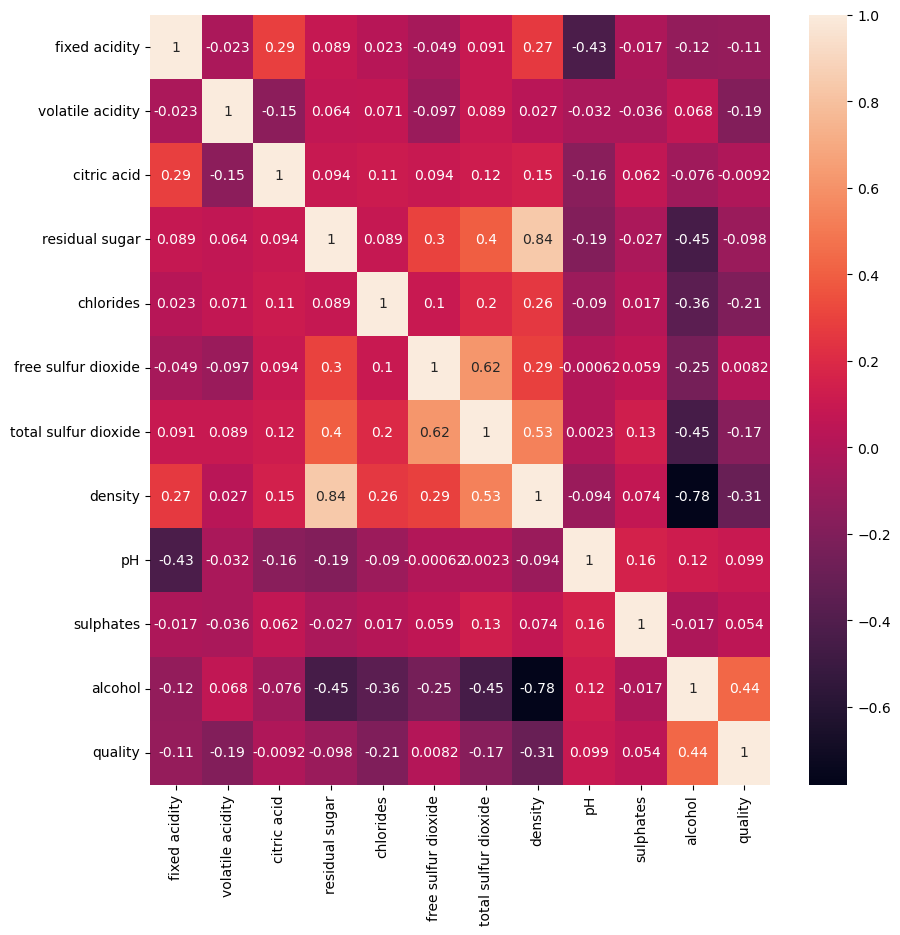

In [93]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [94]:
x=df["alcohol"]
x

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
4893    11.2
4894     9.6
4895     9.4
4896    12.8
4897    11.8
Name: alcohol, Length: 4898, dtype: float64

In [95]:
y=df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [96]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly.fit_transform(x.values.reshape(-1,1))
x_poly

array([[  8.8 ,  77.44],
       [  9.5 ,  90.25],
       [ 10.1 , 102.01],
       ...,
       [  9.4 ,  88.36],
       [ 12.8 , 163.84],
       [ 11.8 , 139.24]])

In [97]:
linear=LinearRegression()
linear.fit(x_poly,y)

LinearRegression()

In [99]:
y_pred=linear.predict(x_poly)
y_pred

array([5.41402244, 5.56364334, 5.71526275, ..., 5.54047101, 6.66454086,
       6.26201538])

In [101]:
mse=mean_squared_error(y,y_pred)
mse

0.6332241202268127

In [103]:
mean_absolute_error=mean_absolute_error(y,y_pred)
mean_absolute_error

0.6297948256283489

In [104]:
score=r2_score(y,y_pred)
score

0.19251757775267775

In [105]:
linear.intercept_

6.038172233703269

In [106]:
linear.coef_

array([-0.33462067,  0.02996529])

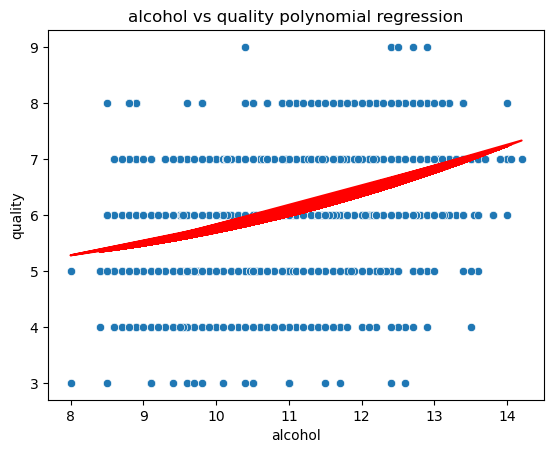

In [108]:
sns.scatterplot(x="alcohol",y="quality",data=df)
plt.plot(x,y_pred,color="red")
plt.title("alcohol vs quality polynomial regression")
plt.show()

## Implementation of Polynomial Regression for multiple features

In [63]:
X=df.drop("quality",axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [64]:
y=df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [65]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [66]:
features=poly.fit_transform(X)
features

array([[7.0000e+00, 2.7000e-01, 3.6000e-01, ..., 2.0250e-01, 3.9600e+00,
        7.7440e+01],
       [6.3000e+00, 3.0000e-01, 3.4000e-01, ..., 2.4010e-01, 4.6550e+00,
        9.0250e+01],
       [8.1000e+00, 2.8000e-01, 4.0000e-01, ..., 1.9360e-01, 4.4440e+00,
        1.0201e+02],
       ...,
       [6.5000e+00, 2.4000e-01, 1.9000e-01, ..., 2.1160e-01, 4.3240e+00,
        8.8360e+01],
       [5.5000e+00, 2.9000e-01, 3.0000e-01, ..., 1.4440e-01, 4.8640e+00,
        1.6384e+02],
       [6.0000e+00, 2.1000e-01, 3.8000e-01, ..., 1.0240e-01, 3.7760e+00,
        1.3924e+02]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [68]:
X_train

array([[7.3000e+00, 1.7000e-01, 3.6000e-01, ..., 1.6810e-01, 5.0840e+00,
        1.5376e+02],
       [6.3000e+00, 2.5000e-01, 4.4000e-01, ..., 2.7040e-01, 4.9400e+00,
        9.0250e+01],
       [5.6000e+00, 3.2000e-01, 3.3000e-01, ..., 2.4010e-01, 5.4390e+00,
        1.2321e+02],
       ...,
       [7.6000e+00, 2.7000e-01, 5.2000e-01, ..., 2.8090e-01, 6.0420e+00,
        1.2996e+02],
       [6.3000e+00, 2.4000e-01, 2.9000e-01, ..., 1.4440e-01, 4.0280e+00,
        1.1236e+02],
       [8.1000e+00, 2.7000e-01, 3.5000e-01, ..., 3.9690e-01, 6.5520e+00,
        1.0816e+02]])

In [69]:
X_test

array([[6.00000000e+00, 2.90000000e-01, 4.10000000e-01, ...,
        3.48100000e-01, 6.47033333e+00, 1.20267778e+02],
       [5.40000000e+00, 5.30000000e-01, 1.60000000e-01, ...,
        2.80900000e-01, 6.99600000e+00, 1.74240000e+02],
       [7.10000000e+00, 2.50000000e-01, 3.90000000e-01, ...,
        1.84900000e-01, 5.24600000e+00, 1.48840000e+02],
       ...,
       [5.90000000e+00, 2.60000000e-01, 2.10000000e-01, ...,
        1.84900000e-01, 4.08500000e+00, 9.02500000e+01],
       [7.50000000e+00, 2.90000000e-01, 3.10000000e-01, ...,
        2.91600000e-01, 5.02200000e+00, 8.64900000e+01],
       [6.70000000e+00, 2.20000000e-01, 3.90000000e-01, ...,
        2.20900000e-01, 4.70000000e+00, 1.00000000e+02]])

In [70]:
y_train

4665    6
1943    5
3399    6
843     7
2580    5
       ..
4426    6
466     6
3092    6
3772    6
860     8
Name: quality, Length: 3918, dtype: int64

In [71]:
y_test

4656    7
3659    8
907     8
4352    5
3271    7
       ..
3207    6
1539    6
964     6
168     5
3661    6
Name: quality, Length: 980, dtype: int64

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model=LinearRegression()

In [74]:
model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred=model.predict(X_test)

In [76]:
y_pred

array([ 6.1075378 ,  6.82305583,  6.52480601,  5.89086083,  6.50867344,
        6.40066054,  5.42453002,  5.18592529,  6.00569212,  4.85596052,
        6.42555234,  4.92814685,  6.6647959 ,  5.33417385,  5.80419928,
        5.59024378,  6.50471148,  5.74421607,  6.15381986,  5.53725567,
        5.62675697,  6.02032371,  5.62360925,  6.12694523,  6.08465912,
        5.66888485,  5.45964025,  6.2596329 ,  5.78133069,  5.49134464,
        5.44271725,  5.89011821,  5.18605043,  5.4885702 ,  5.57995913,
        6.51479411,  6.30709847,  5.32579866,  5.65893645,  5.66357677,
        5.7722782 ,  5.59867428,  6.01106319,  5.44384097,  5.32444792,
        5.76210155,  5.80586069,  5.46403715,  5.74034697,  5.59309186,
        4.73774618,  5.75086437,  5.66368305,  6.24490829,  6.29627669,
        5.91312145,  5.8037475 ,  5.91031043,  5.75273295,  5.79352856,
        6.02619696,  5.84975518,  5.0794197 ,  7.03568189,  6.19450861,
        6.50708274,  6.3444812 ,  5.73749918,  6.10489071,  5.65

In [77]:
model.score(X_train,y_train)

0.37364943317617505

In [78]:
model.score(X_test,y_test)

0.2002678113688855

In [79]:
model.intercept_

13580.528228087996

In [80]:
model.coef_

array([ 3.25994294e+01,  1.41933960e+02,  2.38463702e+02,  5.55019546e-02,
        3.14343414e+02, -2.02443544e+00, -1.63326224e+00, -2.89427666e+04,
        6.31700521e+02,  1.03071969e+02, -3.41951703e+01, -2.26940597e-02,
        1.34582991e-02,  3.05731490e-01,  4.48680183e-03, -3.28291528e-01,
        1.21966984e-03, -9.78440419e-04, -3.36153277e+01,  5.48052125e-01,
        2.18823542e-01, -5.88974053e-02,  1.00587768e+00,  1.09914922e+00,
        1.75961566e-02, -7.65255436e+00,  4.69344939e-03,  4.91523045e-03,
       -1.58746806e+02,  2.93238449e+00,  2.63296387e-01,  2.91336227e-01,
       -1.09760203e+00,  6.96986343e-02,  4.95604554e+00,  7.08423400e-03,
       -1.42879350e-03, -2.51633901e+02,  3.58507694e+00,  1.59283561e-01,
       -2.00646717e-01, -4.66009505e-03, -1.64587947e-01, -1.12802792e-03,
       -3.58746061e-04, -1.75966034e-01,  1.10175431e-01, -4.16998967e-02,
       -3.68155771e-03,  1.53873776e+01, -3.20058796e-02, -2.51130849e-03,
       -2.65062768e+02, -

In [81]:
mse=mean_squared_error(y_test,y_pred)

In [82]:
mse

0.6193710962438334

In [83]:
rmse=np.sqrt(mse)
rmse

0.7870013317929223

In [84]:
mean_above_error=mean_absolute_error(y_test,y_pred)
mean_above_error

0.5669837734350188

In [85]:
from sklearn.metrics import r2_score

In [86]:
score=r2_score(y_test,y_pred)
score

0.2002678113688855

### Linear Regression implementation for checking accuracy

In [31]:
linear_model=LinearRegression()

In [46]:
X=df.drop("quality",axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [47]:
y=df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=linear_model.predict(X_test)
y_pred

array([6.3718293 , 6.39819558, 6.41184115, 5.8298407 , 6.43750933,
       6.36666274, 5.23761241, 5.48030317, 6.08525555, 5.32939063,
       6.48840979, 4.75062408, 6.64482109, 5.46899736, 7.2836232 ,
       5.64425647, 6.74657074, 5.81601279, 6.1499309 , 5.33837093,
       5.76352998, 5.99161371, 5.67524151, 5.8464263 , 6.17011674,
       5.56069533, 5.32646626, 6.24915834, 5.38643461, 5.49761952,
       5.41635994, 5.89138707, 5.67302737, 5.30932517, 5.34896505,
       6.40888157, 6.53803717, 5.3180697 , 5.31512804, 5.66669648,
       5.96832992, 5.5282457 , 5.95849306, 5.58835697, 5.3409576 ,
       5.90541044, 5.18072936, 5.37841758, 5.67576485, 5.7945028 ,
       4.85709232, 5.84913233, 5.72988937, 6.23571885, 6.01691471,
       5.80877638, 5.82842751, 5.85000456, 5.92851381, 5.63408943,
       5.97316492, 6.34292652, 5.1976136 , 6.70693147, 6.16580078,
       6.08953322, 5.89970616, 5.65046742, 6.0500044 , 5.28675595,
       5.28011815, 6.06841673, 4.66973539, 4.45514111, 5.88903

In [51]:
model.intercept_

13580.528228087996

In [52]:
model.coef_

array([ 3.25994294e+01,  1.41933960e+02,  2.38463702e+02,  5.55019546e-02,
        3.14343414e+02, -2.02443544e+00, -1.63326224e+00, -2.89427666e+04,
        6.31700521e+02,  1.03071969e+02, -3.41951703e+01, -2.26940597e-02,
        1.34582991e-02,  3.05731490e-01,  4.48680183e-03, -3.28291528e-01,
        1.21966984e-03, -9.78440419e-04, -3.36153277e+01,  5.48052125e-01,
        2.18823542e-01, -5.88974053e-02,  1.00587768e+00,  1.09914922e+00,
        1.75961566e-02, -7.65255436e+00,  4.69344939e-03,  4.91523045e-03,
       -1.58746806e+02,  2.93238449e+00,  2.63296387e-01,  2.91336227e-01,
       -1.09760203e+00,  6.96986343e-02,  4.95604554e+00,  7.08423400e-03,
       -1.42879350e-03, -2.51633901e+02,  3.58507694e+00,  1.59283561e-01,
       -2.00646717e-01, -4.66009505e-03, -1.64587947e-01, -1.12802792e-03,
       -3.58746061e-04, -1.75966034e-01,  1.10175431e-01, -4.16998967e-02,
       -3.68155771e-03,  1.53873776e+01, -3.20058796e-02, -2.51130849e-03,
       -2.65062768e+02, -

In [53]:
mse=mean_squared_error(y_test,y_pred)
mse

0.5690247717229232

In [54]:
mean_above_error=mean_absolute_error(y_test,y_pred)
mean_above_error

0.5862665383250447

In [55]:
score=r2_score(y_test,y_pred)
score

0.2652750042179184

In [56]:
linear_model.score(X_train,y_train)

0.2843126626389435

In [57]:
linear_model.score(X_test,y_test)

0.2652750042179184